<a href="https://colab.research.google.com/github/MuhammadRifatA/PCVK/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan50


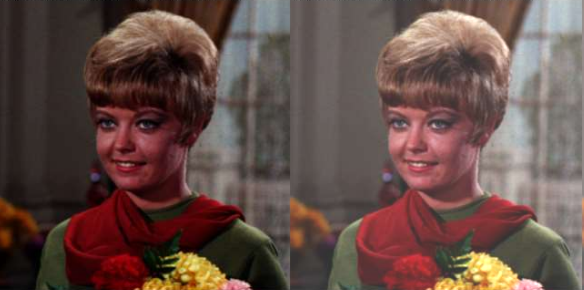

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan'))
except ValueError:
  print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/Kuliah/PCVK/Screenshot 2023-09-12 090055.png')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv2.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Dengan Inverse

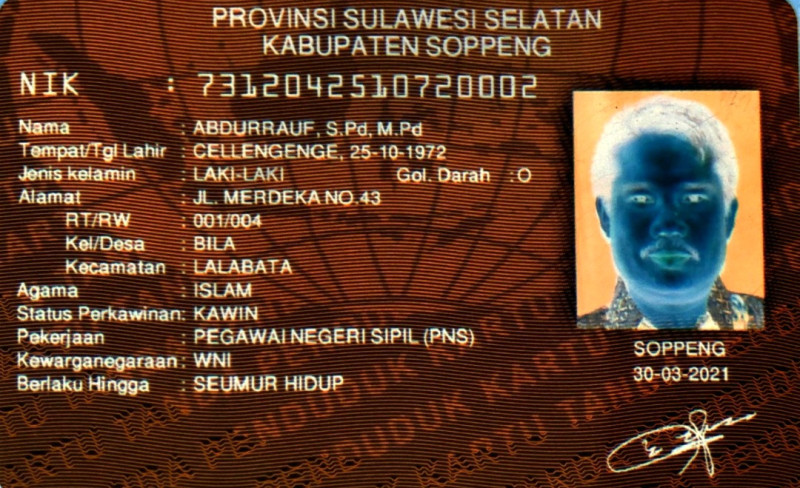

In [19]:
path = '/content/drive/MyDrive/Kuliah/PCVK/KTP.jpeg'
image = cv2.imread(path)
inverte = np.zeros(image.shape, image.dtype)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            inverte[y,x,c] = np.clip(255 - image[y,x,c] ,0,255)
cv2_imshow(inverte)

Dengan OpenCV

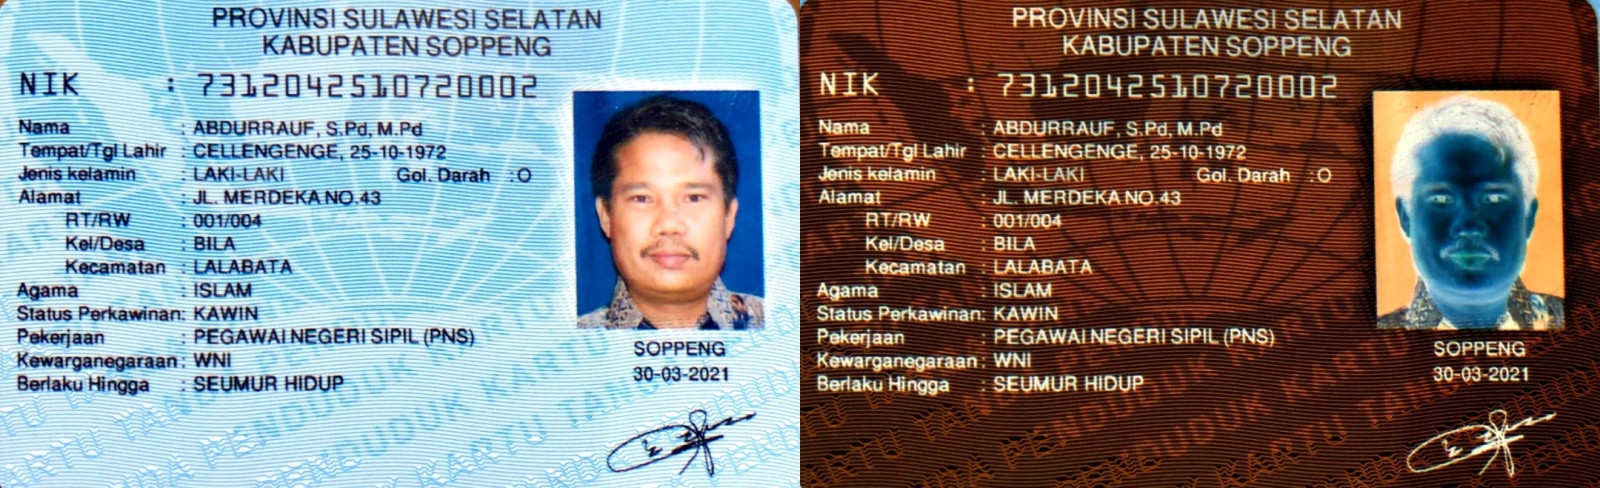

In [14]:
from IPython.utils import path
import cv2

path='/content/drive/MyDrive/Kuliah/PCVK/KTP.jpeg'
image = cv2.imread(path)
inverted_image = cv2.bitwise_not(image)

Invertedframe = cv2.hconcat((image, inverted_image))
cv2_imshow(Invertedframe)

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50 50
Masukkan Kontras [1.0 - 3.0]: 22


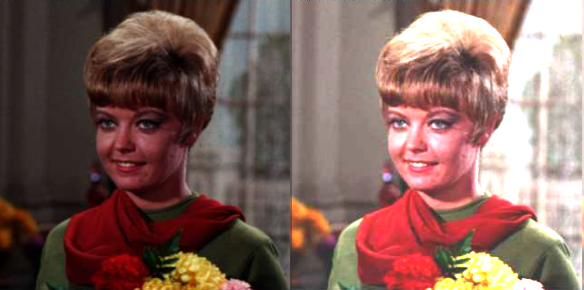

In [20]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]:  '))
  contrast = int(input('Masukkan Kontras [1.0 - 3.0]:  '))
except ValueError:
  print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/Kuliah/PCVK/Screenshot 2023-09-12 090055.png')
contrast_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv2.hconcat((original, contrast_image))
cv2_imshow(final_frame)

Masukkan nilai kecerahan [-255 - 255]:  50


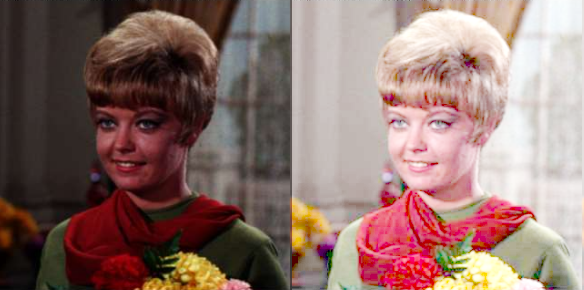

In [22]:
import numpy as np

def logaritmikBrightness(image,kecerahan):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
      for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            brightness_image[y,x,c] = np.clip(kecerahan * np.log(1 + original[y,x,c]), 0, 255)

  return brightness_image

try:
    brightness = int(input('Masukkan nilai kecerahan [-255 - 255]:  '))
except ValueError:
  print('Error, not a number')

converted = logaritmikBrightness(original, brightness)

final_frame = cv2.hconcat((original, converted))
cv2_imshow(final_frame)

<ipython-input-24-98ae98d16fa2>:12: RuntimeWarning: overflow encountered in ubyte_scalars
  average = (red + green + blue) / 3


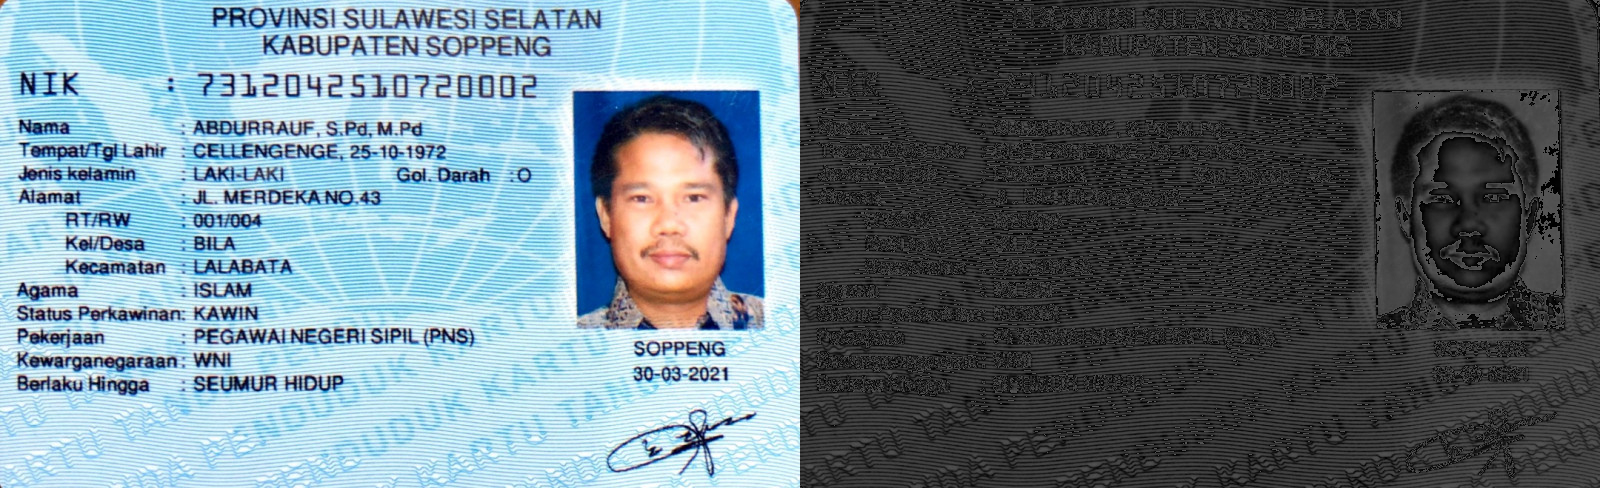

In [24]:
def avgBright(image):
  brightness_image = np.zeros(image.shape, image.dtype)


  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        red = image[y, x, 2]
        green = image[y, x, 1]
        blue = image[y, x, 0]

        average = (red + green + blue) / 3
        brightness_image[y,x,c] = np.clip(average, 0, 255)
  return brightness_image

  path='/content/drive/MyDrive/Kuliah/PCVK/KTP.jpeg'
image = cv2.imread(path)
converted = avgBright(image)

final_frame = cv2.hconcat((image, converted))
cv2_imshow(final_frame)

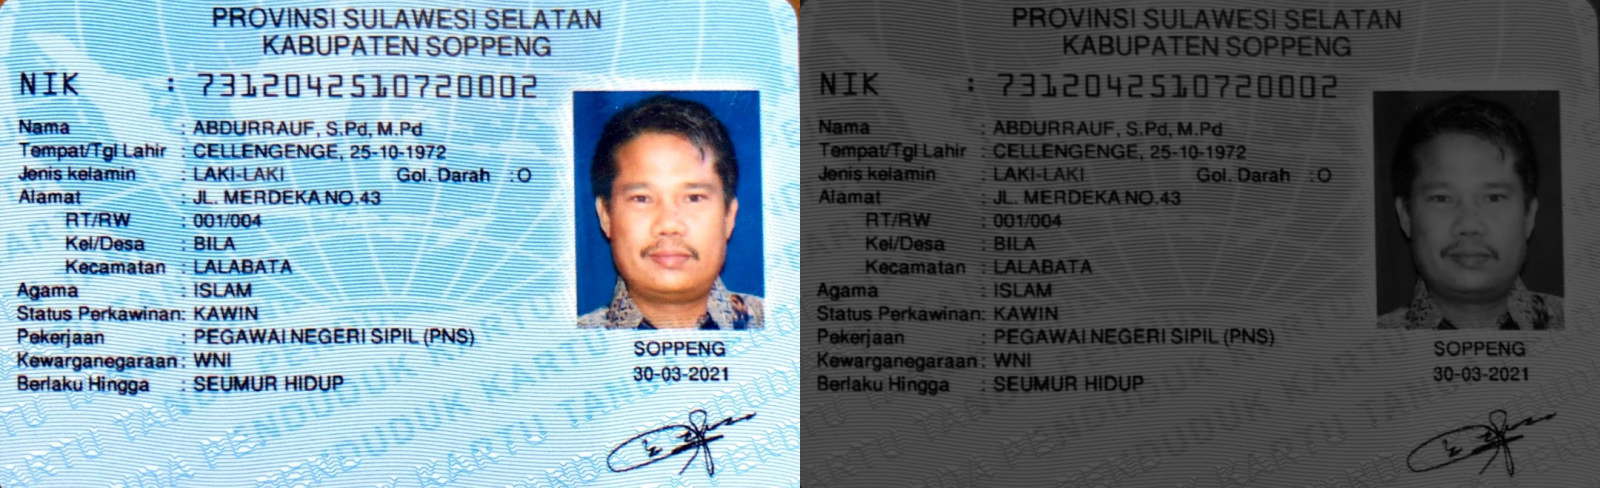

In [30]:
def greysclLight(image):
  brightness_image = np.zeros(image.shape, image.dtype)


  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        red = image[y, x, 2]*0.11
        green = image[y, x, 1]*0.55
        blue = image[y, x, 0]*0.2

        maxmin = (max(red,green,blue)+min(red,green,blue)) / 2
        brightness_image[y,x,c] = np.clip(maxmin, 0, 255)
  return brightness_image

  path='/content/drive/MyDrive/Kuliah/PCVK/KTP.jpeg'
image = cv2.imread(path)
converted = greysclLight(image)

final_frame = cv2.hconcat((image, converted))
cv2_imshow(final_frame)

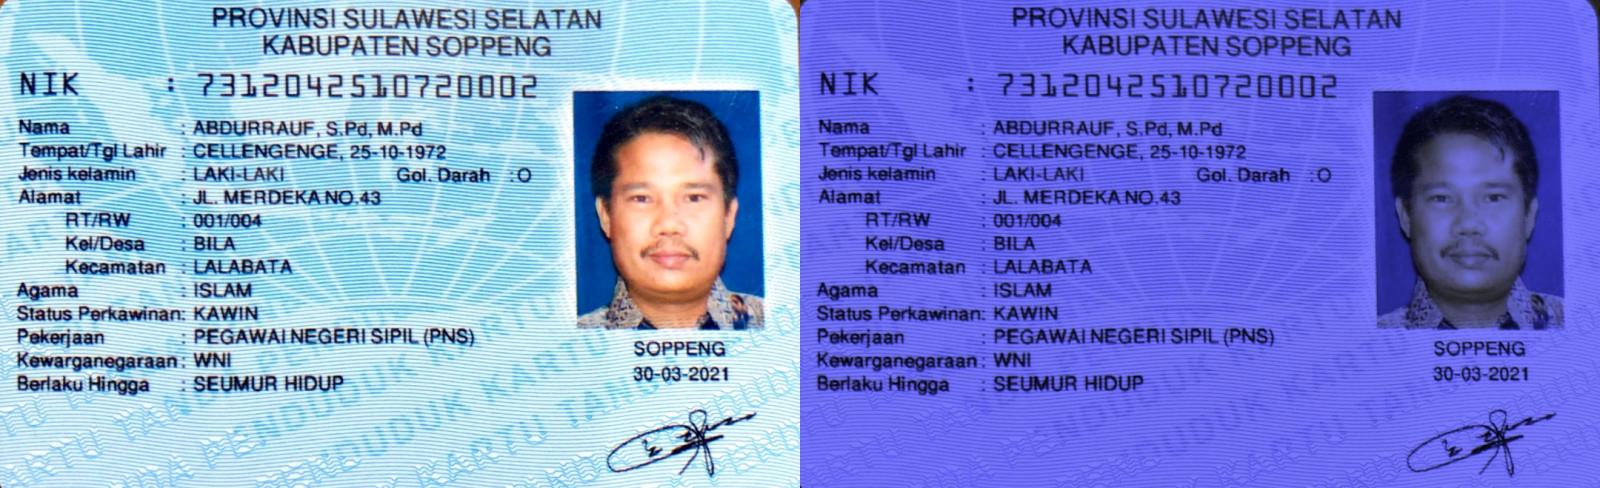

In [34]:
def greysclLumi(image):
  greyscale_image = np.zeros(image.shape, image.dtype)


  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
         red = image[y, x, 2]*0.11
         green = image[y, x, 1]*0.17
         blue = image[y, x, 0]*0.2

         maxmin = red + green + blue

         greyscale_image[y,x,0] = image[y,x,0]
         greyscale_image[y,x,1] = np.clip(maxmin, 0, 255)
         greyscale_image[y,x,2] = np.clip(maxmin, 0, 255)
  return greyscale_image

  path='/content/drive/MyDrive/Kuliah/PCVK/KTP.jpeg'
image = cv2.imread(path)
converted = greysclLumi(image)

final_frame = cv2.hconcat((image, converted))
cv2_imshow(final_frame)